# 📉 Dimensionality Reduction

**Dimensionality Reduction** is a crucial technique in machine learning that reduces the number of features in a dataset while preserving as much information as possible. This process addresses the "curse of dimensionality" and provides numerous benefits for data analysis and modeling.

## Why Dimensionality Reduction?

### The Curse of Dimensionality:
As the number of features increases, the volume of the feature space grows exponentially, causing:
* **Sparsity**: Data points become increasingly sparse
* **Computational Cost**: Training time and memory requirements explode
* **Overfitting**: Models memorize noise rather than learning patterns
* **Visualization Challenges**: Impossible to visualize beyond 3 dimensions

### Benefits of Dimensionality Reduction:
1. **Improved Model Performance**: Remove noise and irrelevant features
2. **Faster Training**: Fewer features mean faster computation
3. **Better Visualization**: Reduce to 2D or 3D for plotting
4. **Storage Efficiency**: Smaller datasets require less memory
5. **Noise Reduction**: Focus on signal, ignore noise

## Techniques Covered:
This notebook explores both **linear** and **non-linear** dimensionality reduction techniques:
* **Principal Component Analysis (PCA)**: Linear transformation maximizing variance
* **Linear Discriminant Analysis (LDA)**: Supervised linear technique maximizing class separability
* **t-SNE**: Non-linear technique excellent for visualization
* **Feature Selection**: Selecting the most important original features

---
## 1. Importing Essential Libraries

In [1]:
# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Scikit-learn modules
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

---
## 2. Data Loading and Exploration

We'll use the **Digits dataset**, which contains 1,797 samples of handwritten digits (0-9). Each digit is represented by an 8×8 pixel image, flattened into 64 features. This is perfect for demonstrating dimensionality reduction because:
* It has many features (64)
* It has clear structure (digits)
* It's small enough to process quickly
* Results are interpretable (we can visualize digits)

In [2]:
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

print("="*60)
print("DATASET INFORMATION")
print("="*60)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class labels: {np.unique(y)}")
print(f"Feature range: [{X.min():.2f}, {X.max():.2f}]")
print("="*60)

DATASET INFORMATION
Number of samples: 1797
Number of features: 64
Number of classes: 10
Class labels: [0 1 2 3 4 5 6 7 8 9]
Feature range: [0.00, 16.00]


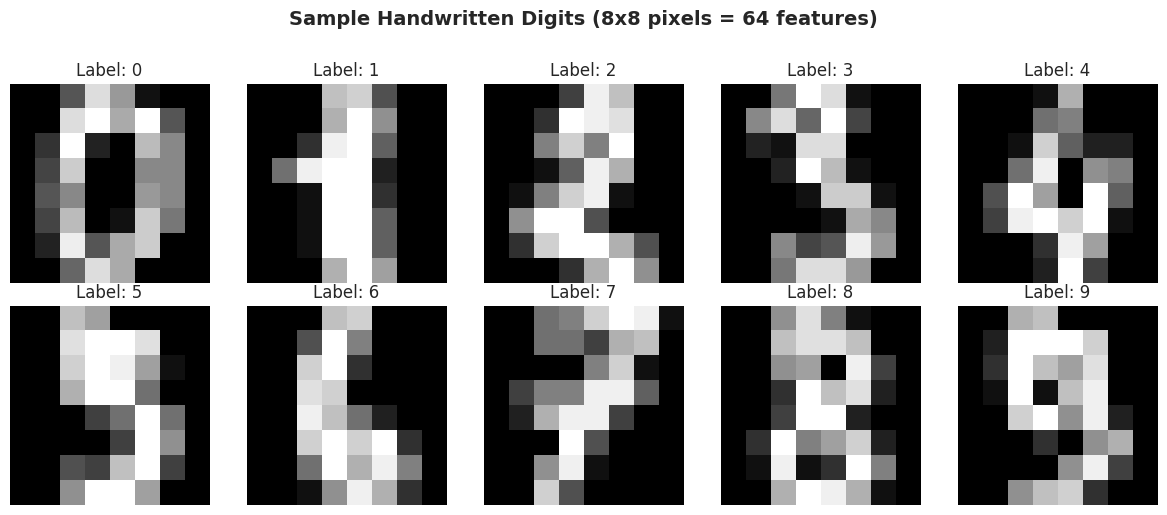

In [3]:
# Visualize sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.suptitle('Sample Handwritten Digits (8x8 pixels = 64 features)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Data Preprocessing: Standardization

For PCA and LDA, it's crucial to **standardize** the features (mean=0, variance=1) because:
* These methods are sensitive to the scale of features
* Features with larger scales would dominate the principal components
* Standardization ensures each feature contributes proportionally

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data - Mean: {X.mean():.2f}, Std: {X.std():.2f}")
print(f"Scaled data   - Mean: {X_scaled.mean():.2f}, Std: {X_scaled.std():.2f}")

Original data - Mean: 4.88, Std: 6.02
Scaled data   - Mean: 0.00, Std: 0.98


---
## 3. Principal Component Analysis (PCA)

**PCA** is the most popular linear dimensionality reduction technique. It transforms the original features into a new set of uncorrelated features called **principal components**, ordered by the amount of variance they explain.

### How PCA Works:
1. **Standardize** the data (already done)
2. **Compute covariance matrix** of features
3. **Calculate eigenvectors and eigenvalues** of the covariance matrix
4. **Sort eigenvectors** by eigenvalues in descending order
5. **Select top k eigenvectors** (principal components)
6. **Transform** data into the new k-dimensional space

### Key Concepts:
* **Principal Components**: New orthogonal axes that maximize variance
* **Explained Variance**: How much information each component captures
* **Cumulative Variance**: Total information captured by first k components
* **Unsupervised**: PCA doesn't use class labels

### 3.1 Understanding Variance Explained

In [5]:
# Fit PCA with all components to understand variance distribution
pca_full = PCA()
pca_full.fit(X_scaled)

# Get explained variance ratio
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Variance explained by first 10 components:")
for i in range(10):
    print(f"  PC{i+1}: {explained_variance[i]:.4f} "
          f"(Cumulative: {cumulative_variance[i]:.4f})")

Variance explained by first 10 components:
  PC1: 0.1203 (Cumulative: 0.1203)
  PC2: 0.0956 (Cumulative: 0.2159)
  PC3: 0.0844 (Cumulative: 0.3004)
  PC4: 0.0650 (Cumulative: 0.3654)
  PC5: 0.0486 (Cumulative: 0.4140)
  PC6: 0.0421 (Cumulative: 0.4561)
  PC7: 0.0394 (Cumulative: 0.4955)
  PC8: 0.0339 (Cumulative: 0.5294)
  PC9: 0.0300 (Cumulative: 0.5594)
  PC10: 0.0293 (Cumulative: 0.5887)


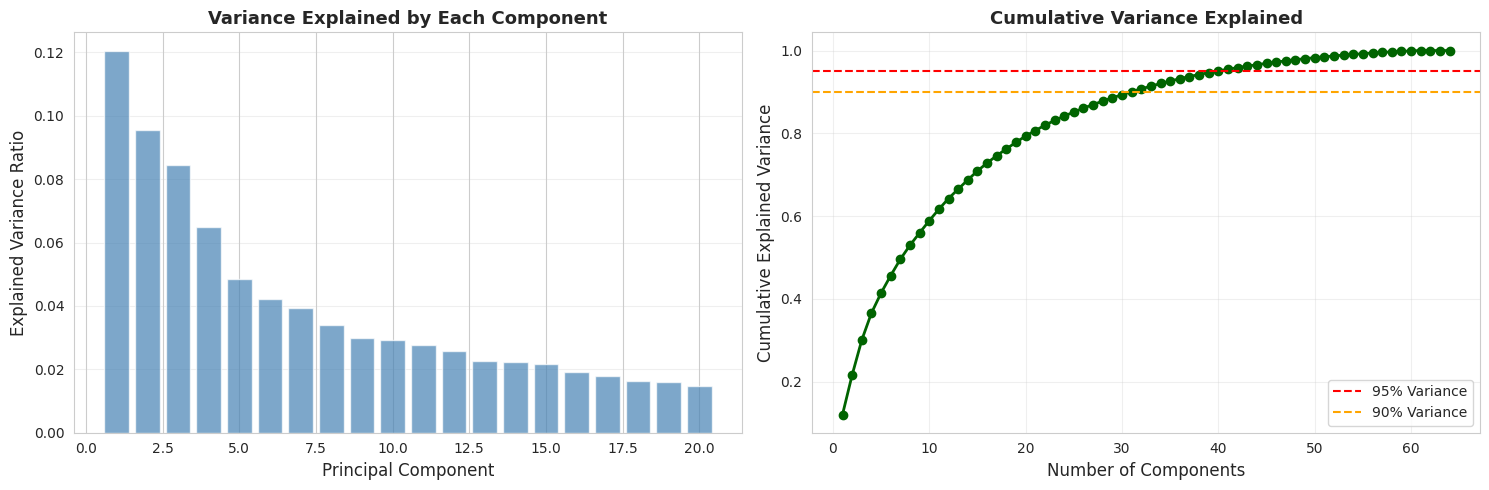


Number of components needed for 95% variance: 40
Dimensionality reduction: 64 → 40 (37.5% reduction)


In [6]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Individual variance
ax1.bar(range(1, 21), explained_variance[:20], alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Variance Explained by Each Component', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
         'o-', linewidth=2, markersize=6, color='darkgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")
print(f"Dimensionality reduction: {X.shape[1]} → {n_components_95} "
      f"({100*(1-n_components_95/X.shape[1]):.1f}% reduction)")

### Interpretation:
* The first few components capture most of the variance
* This is the "elbow" principle: we can reduce dimensions significantly while retaining information
* Typically, we aim for 90-95% cumulative variance
* In this case, we can reduce from 64 to ~40 features while keeping 95% of information

### 3.2 PCA for Visualization (2D and 3D)

In [7]:
# Apply PCA to reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"2D PCA - Explained variance: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"  Component 1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"  Component 2: {pca_2d.explained_variance_ratio_[1]:.4f}")

2D PCA - Explained variance: 0.2159
  Component 1: 0.1203
  Component 2: 0.0956


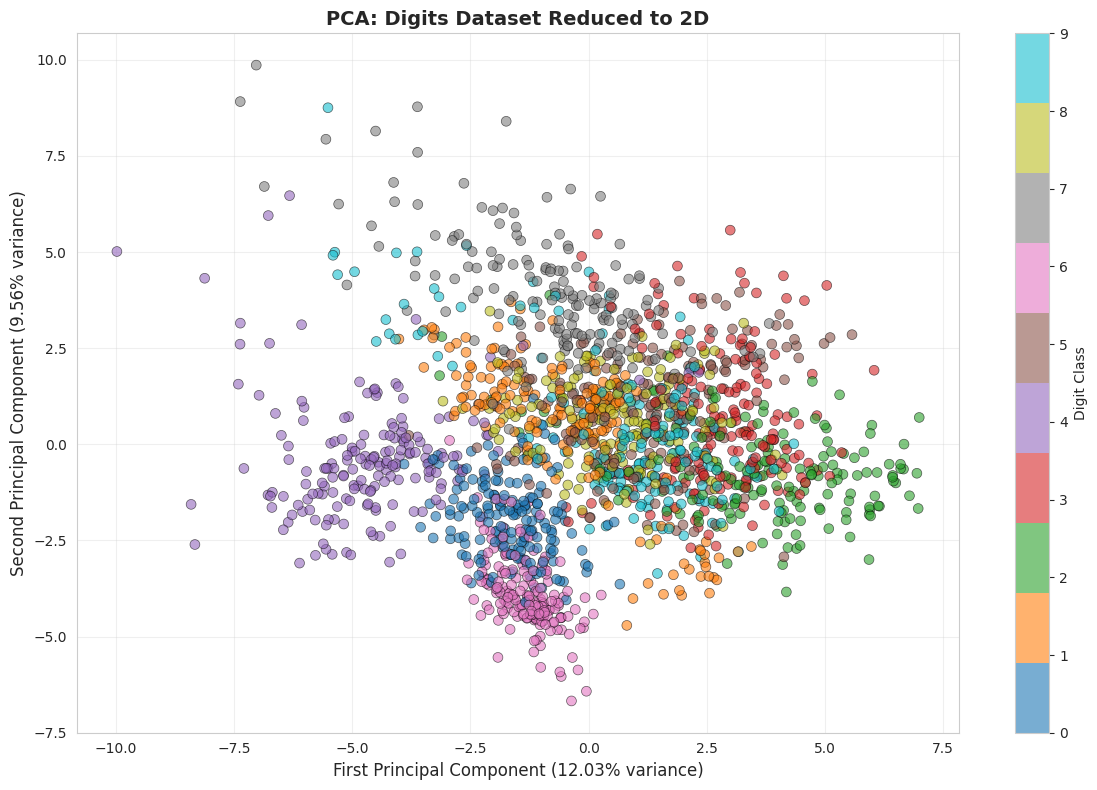

In [8]:
# Visualize in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                     c=y, cmap='tab10',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.2%} variance)',
           fontsize=12)
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.2%} variance)',
           fontsize=12)
plt.title('PCA: Digits Dataset Reduced to 2D', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

3D PCA - Explained variance: 0.3004


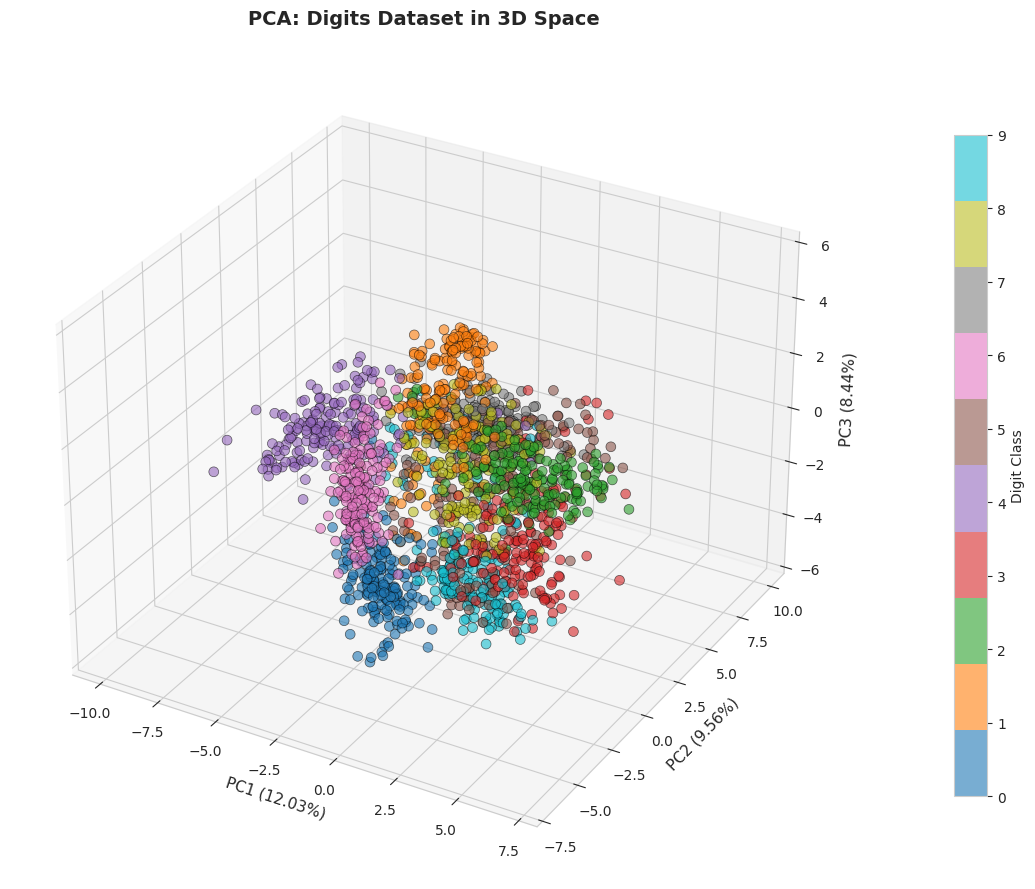

In [9]:
# Apply PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"3D PCA - Explained variance: {pca_3d.explained_variance_ratio_.sum():.4f}")

# Visualize in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=y, cmap='tab10',
                    alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=11)
ax.set_title('PCA: Digits Dataset in 3D Space', fontsize=14, fontweight='bold', pad=20)

plt.colorbar(scatter, label='Digit Class', pad=0.1, shrink=0.8)
plt.tight_layout()
plt.show()

### Observations:
* Some digit classes cluster together (e.g., 0, 6, 8 are visually similar)
* Clear separation for distinct digits (e.g., 1)
* PCA captures overall variance but doesn't maximize class separability
* 2D captures ~20% of variance, 3D captures ~30%

### 3.3 PCA for Machine Learning Performance

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Test different numbers of components
n_components_list = [5, 10, 20, 30, 40, 50, 64]
results = []

for n_comp in n_components_list:
    # Apply PCA
    if n_comp < 64:
        pca = PCA(n_components=n_comp)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        variance = pca.explained_variance_ratio_.sum()
    else:
        X_train_pca = X_train
        X_test_pca = X_test
        variance = 1.0

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train_pca, y_train)

    # Evaluate
    accuracy = rf.score(X_test_pca, y_test)
    results.append((n_comp, variance, accuracy))
    print(f"Components: {n_comp:2d} | Variance: {variance:.4f} | Accuracy: {accuracy:.4f}")

# Convert to DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['n_components', 'variance', 'accuracy'])

Components:  5 | Variance: 0.4300 | Accuracy: 0.8611
Components: 10 | Variance: 0.6114 | Accuracy: 0.9148
Components: 20 | Variance: 0.8076 | Accuracy: 0.9463
Components: 30 | Variance: 0.9017 | Accuracy: 0.9574
Components: 40 | Variance: 0.9554 | Accuracy: 0.9481
Components: 50 | Variance: 0.9855 | Accuracy: 0.9444
Components: 64 | Variance: 1.0000 | Accuracy: 0.9685


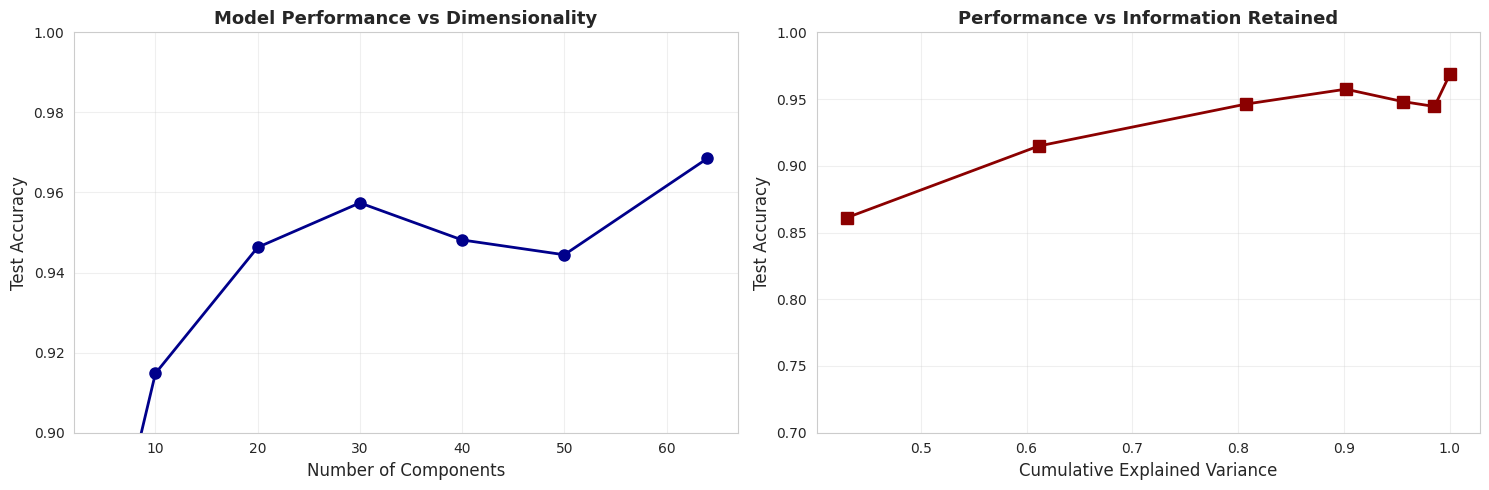

In [11]:
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy vs Components
ax1.plot(results_df['n_components'], results_df['accuracy'],
         'o-', linewidth=2, markersize=8, color='darkblue')
ax1.set_xlabel('Number of Components', fontsize=12)
ax1.set_ylabel('Test Accuracy', fontsize=12)
ax1.set_title('Model Performance vs Dimensionality', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.set_ylim([0.9, 1.0])

# Accuracy vs Variance
ax2.plot(results_df['variance'], results_df['accuracy'],
         's-', linewidth=2, markersize=8, color='darkred')
ax2.set_xlabel('Cumulative Explained Variance', fontsize=12)
ax2.set_ylabel('Test Accuracy', fontsize=12)
ax2.set_title('Performance vs Information Retained', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()

### Key Findings:
* With just 20 components (~80% variance), we achieve near-optimal performance
* Reducing from 64 to 20 features = 69% dimensionality reduction
* Benefits: **Faster training**, **less memory**, **reduced overfitting risk**
* Minimal accuracy loss with substantial computational savings

---
## 4. Linear Discriminant Analysis (LDA)

**LDA** is a supervised dimensionality reduction technique that maximizes the separation between classes. Unlike PCA (which maximizes variance), LDA finds the directions that maximize the ratio of between-class variance to within-class variance.

### Key Differences from PCA:
* **Supervised**: Uses class labels
* **Goal**: Maximize class separability (not total variance)
* **Limitation**: Maximum of (n_classes - 1) components
* **Use Case**: Classification tasks with known labels

### How LDA Works:
1. Calculate the **mean vectors** for each class
2. Compute **within-class** scatter matrix (variance within each class)
3. Compute **between-class** scatter matrix (variance between class means)
4. Find linear discriminants that maximize between-class / within-class variance
5. Project data onto these discriminants

In [12]:
# Apply LDA (maximum 9 components for 10 classes)
lda_2d = LDA(n_components=2)
X_lda_2d = lda_2d.fit_transform(X_scaled, y)

print(f"LDA - Explained variance ratio: {lda_2d.explained_variance_ratio_}")
print(f"Total variance explained: {lda_2d.explained_variance_ratio_.sum():.4f}")

LDA - Explained variance ratio: [0.28912041 0.18262788]
Total variance explained: 0.4717


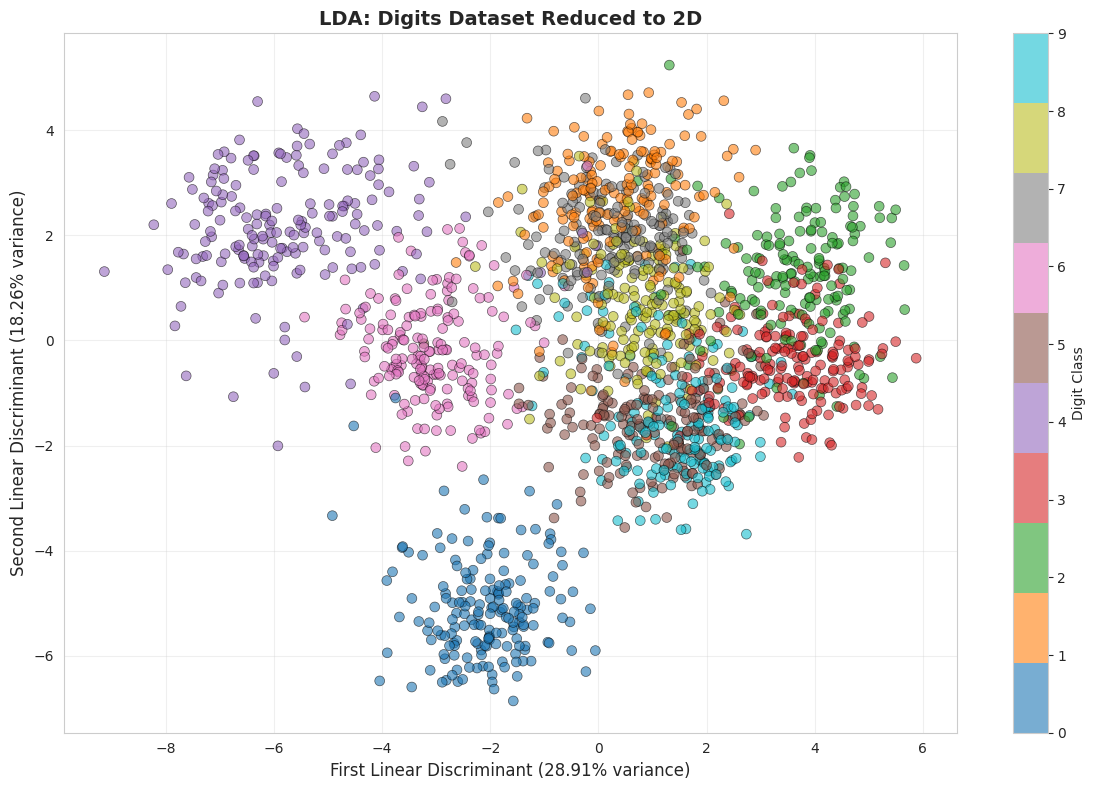

In [13]:
# Visualize LDA in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1],
                     c=y, cmap='tab10',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel(f'First Linear Discriminant ({lda_2d.explained_variance_ratio_[0]:.2%} variance)',
           fontsize=12)
plt.ylabel(f'Second Linear Discriminant ({lda_2d.explained_variance_ratio_[1]:.2%} variance)',
           fontsize=12)
plt.title('LDA: Digits Dataset Reduced to 2D', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 4.1 Comparing PCA vs LDA

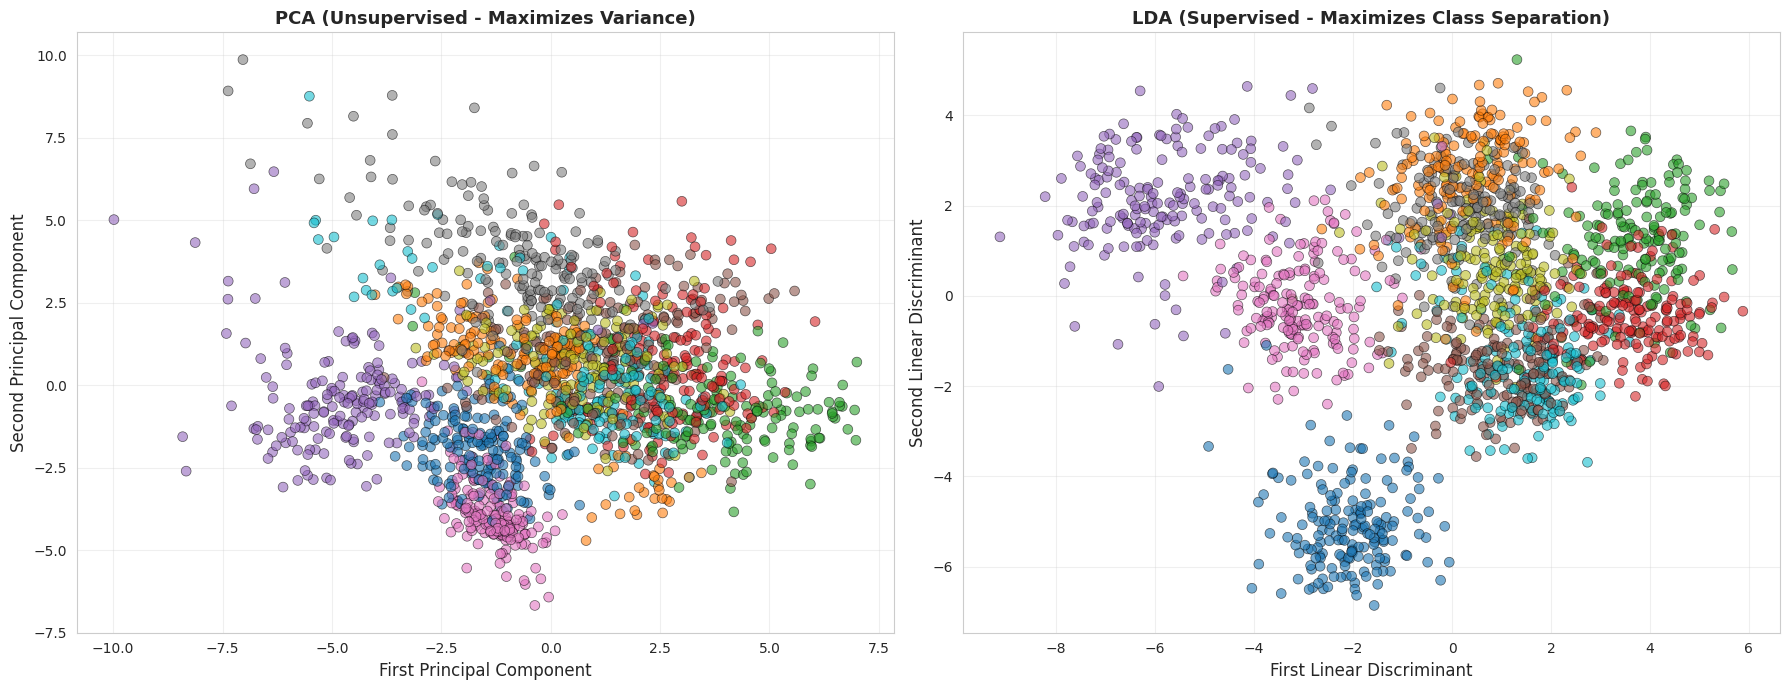


PCA vs LDA COMPARISON
PCA - Variance explained: 0.2159
LDA - Variance explained: 0.4717

Key Difference:
  LDA: Better class separation visible (clusters more distinct)
  PCA: Optimizes for variance, not explicitly class separation


In [15]:
# Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# PCA plot
scatter1 = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=y, cmap='tab10', alpha=0.6, s=50,
                      edgecolors='black', linewidth=0.5)
ax1.set_xlabel('First Principal Component', fontsize=12)
ax1.set_ylabel('Second Principal Component', fontsize=12)
ax1.set_title('PCA (Unsupervised - Maximizes Variance)',
              fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)

# LDA plot
scatter2 = ax2.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1],
                      c=y, cmap='tab10', alpha=0.6, s=50,
                      edgecolors='black', linewidth=0.5)
ax2.set_xlabel('First Linear Discriminant', fontsize=12)
ax2.set_ylabel('Second Linear Discriminant', fontsize=12)
ax2.set_title('LDA (Supervised - Maximizes Class Separation)',
              fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PCA vs LDA COMPARISON")
print("="*60)
print(f"PCA - Variance explained: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"LDA - Variance explained: {lda_2d.explained_variance_ratio_.sum():.4f}")
print("\nKey Difference:")
print("  LDA: Better class separation visible (clusters more distinct)")
print("  PCA: Optimizes for variance, not explicitly class separation")
print("="*60)

### When to Use PCA vs LDA:

**Use PCA when:**
* You want to reduce dimensionality without using labels (unsupervised)
* You need to capture maximum variance in the data
* You want more than (n_classes - 1) components
* Labels are not available or not reliable

**Use LDA when:**
* You have labeled data for classification
* You want to maximize class separability
* (n_classes - 1) components are sufficient
* Your goal is classification performance

---
## 5. t-SNE (t-Distributed Stochastic Neighbor Embedding)

**t-SNE** is a non-linear dimensionality reduction technique particularly well-suited for **visualization** of high-dimensional data. It excels at revealing local structure and clusters.

### How t-SNE Works:
1. Compute **pairwise similarities** in high-dimensional space (Gaussian distribution)
2. Define similar **pairwise similarities** in low-dimensional space (t-distribution)
3. **Minimize** the difference between these two distributions using gradient descent
4. Result: Similar points stay close, dissimilar points are pushed apart

### Important Characteristics:
* **Non-linear**: Can capture complex manifold structures
* **Stochastic**: Results vary between runs (use random_state)
* **Slow**: Computationally expensive for large datasets
* **Visualization-focused**: Primarily for 2D/3D visualization
* **Not for ML**: Don't use t-SNE transformed data for training models

### Key Hyperparameters:
* **perplexity**: Balance between local and global structure (5-50 typical)
* **learning_rate**: Step size for optimization (10-1000)
* **n_iter**: Number of optimization iterations (1000+ recommended)

In [16]:
# Apply t-SNE (this may take a minute)
print("Running t-SNE... (this may take 30-60 seconds)")
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
print("t-SNE completed!")

Running t-SNE... (this may take 30-60 seconds)
t-SNE completed!


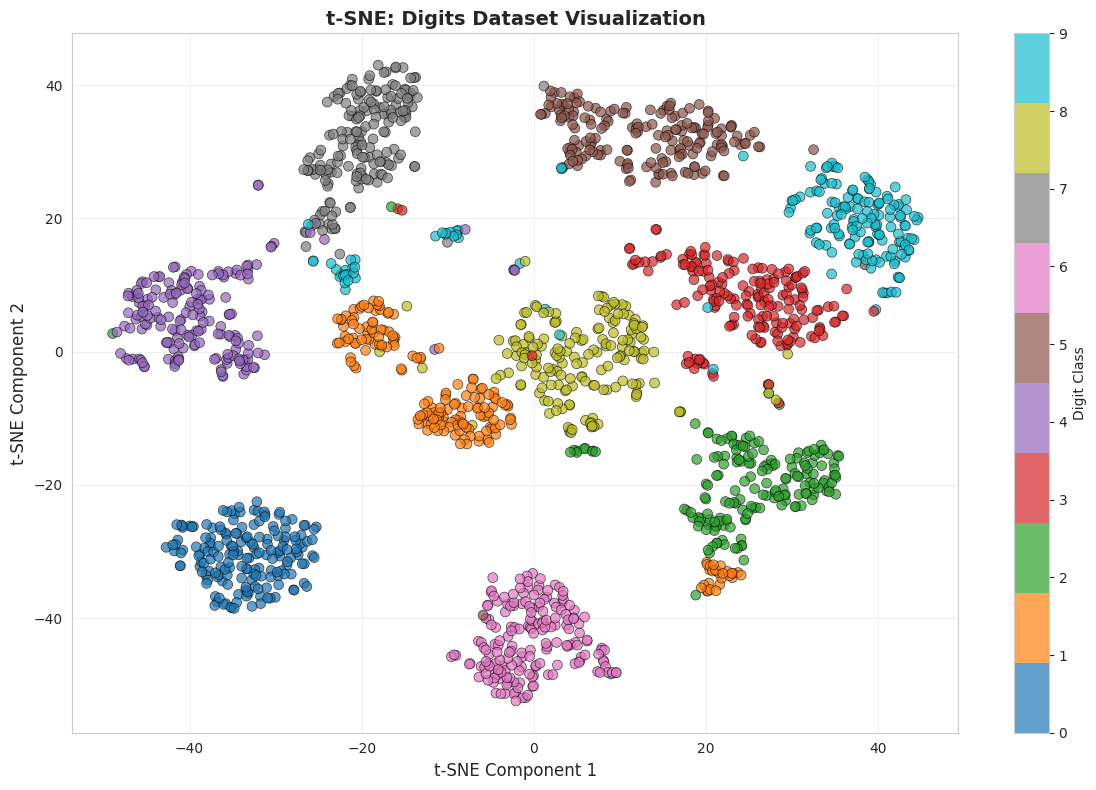

In [17]:
# Visualize t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                     c=y, cmap='tab10',
                     alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('t-SNE: Digits Dataset Visualization', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.1 Comprehensive Comparison: PCA vs LDA vs t-SNE

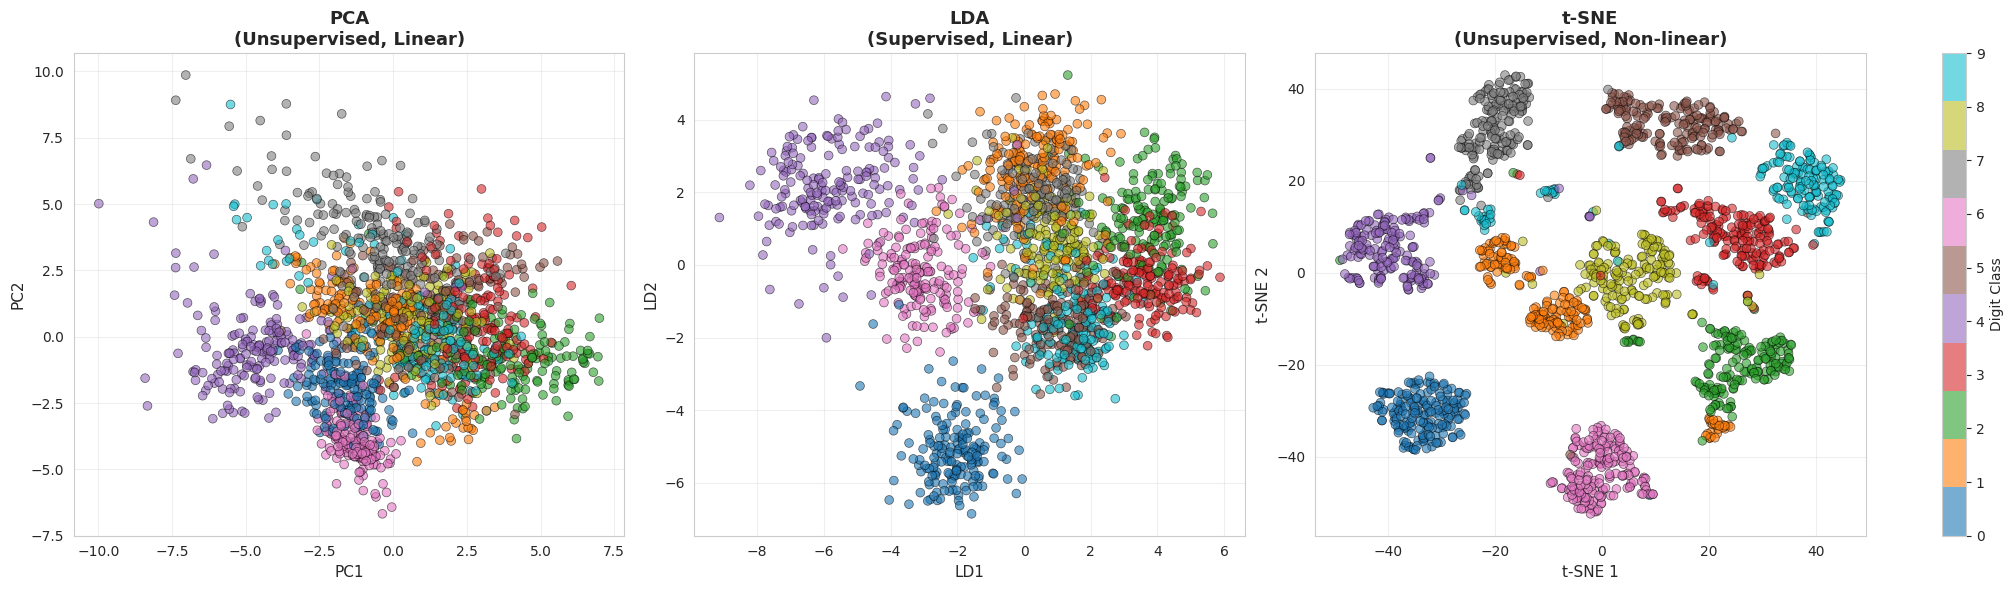

In [18]:
# Create comprehensive comparison plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                          c=y, cmap='tab10', alpha=0.6, s=40,
                          edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].set_title('PCA\n(Unsupervised, Linear)', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# LDA
scatter2 = axes[1].scatter(X_lda_2d[:, 0], X_lda_2d[:, 1],
                          c=y, cmap='tab10', alpha=0.6, s=40,
                          edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('LD1', fontsize=11)
axes[1].set_ylabel('LD2', fontsize=11)
axes[1].set_title('LDA\n(Supervised, Linear)', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

# t-SNE
scatter3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1],
                          c=y, cmap='tab10', alpha=0.6, s=40,
                          edgecolors='black', linewidth=0.5)
axes[2].set_xlabel('t-SNE 1', fontsize=11)
axes[2].set_ylabel('t-SNE 2', fontsize=11)
axes[2].set_title('t-SNE\n(Unsupervised, Non-linear)', fontsize=13, fontweight='bold')
axes[2].grid(alpha=0.3)

# Add colorbar
plt.tight_layout()
fig.colorbar(scatter3, ax=axes, label='Digit Class', fraction=0.02, pad=0.04)
plt.show()

### Observations:
* **PCA**: Good overall structure, some class overlap
* **LDA**: Better class separation due to supervised learning
* **t-SNE**: Excellent clustering, reveals fine-grained local structure

### Summary Table:

| Feature | PCA | LDA | t-SNE |
|---------|-----|-----|-------|
| **Type** | Unsupervised | Supervised | Unsupervised |
| **Linearity** | Linear | Linear | Non-linear |
| **Speed** | Fast | Fast | Slow |
| **Max Components** | n_features | n_classes - 1 | Any (typically 2-3) |
| **Use Labels** | No | Yes | No |
| **For ML** | ✓ Yes | ✓ Yes | ✗ No (visualization only) |
| **Preserves** | Global variance | Class separability | Local structure |
| **Best For** | Feature reduction | Classification | Visualization |

---
## 6. Feature Selection vs Feature Extraction

So far, we've focused on **feature extraction** (PCA, LDA, t-SNE), which creates new features by combining original ones. Another approach is **feature selection**, which selects a subset of original features.

### Feature Extraction:
* Creates **new features** as combinations of original features
* Examples: PCA, LDA, Autoencoders
* **Pros**: Can capture complex relationships, reduces noise
* **Cons**: Less interpretable, original features are lost

### Feature Selection:
* Selects **subset of original features**
* Examples: Chi-square, Mutual Information, Tree-based importance
* **Pros**: Maintains interpretability, preserves original features
* **Cons**: May miss feature interactions

Let's demonstrate feature selection using Random Forest importance:

In [19]:
# Train Random Forest on full dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

print("Top 20 Most Important Features (Pixel Positions):")
for i in range(20):
    pixel_row = indices[i] // 8
    pixel_col = indices[i] % 8
    print(f"  Rank {i+1}: Feature {indices[i]:2d} (Row {pixel_row}, Col {pixel_col}) - "
          f"Importance: {feature_importances[indices[i]]:.4f}")

Top 20 Most Important Features (Pixel Positions):
  Rank 1: Feature 21 (Row 2, Col 5) - Importance: 0.0510
  Rank 2: Feature 43 (Row 5, Col 3) - Importance: 0.0449
  Rank 3: Feature 36 (Row 4, Col 4) - Importance: 0.0446
  Rank 4: Feature 26 (Row 3, Col 2) - Importance: 0.0393
  Rank 5: Feature 42 (Row 5, Col 2) - Importance: 0.0360
  Rank 6: Feature 20 (Row 2, Col 4) - Importance: 0.0327
  Rank 7: Feature 61 (Row 7, Col 5) - Importance: 0.0321
  Rank 8: Feature 33 (Row 4, Col 1) - Importance: 0.0315
  Rank 9: Feature 34 (Row 4, Col 2) - Importance: 0.0286
  Rank 10: Feature 30 (Row 3, Col 6) - Importance: 0.0280
  Rank 11: Feature 28 (Row 3, Col 4) - Importance: 0.0272
  Rank 12: Feature 38 (Row 4, Col 6) - Importance: 0.0272
  Rank 13: Feature 44 (Row 5, Col 4) - Importance: 0.0263
  Rank 14: Feature 19 (Row 2, Col 3) - Importance: 0.0256
  Rank 15: Feature 10 (Row 1, Col 2) - Importance: 0.0255
  Rank 16: Feature 29 (Row 3, Col 5) - Importance: 0.0251
  Rank 17: Feature 54 (Row 6, C

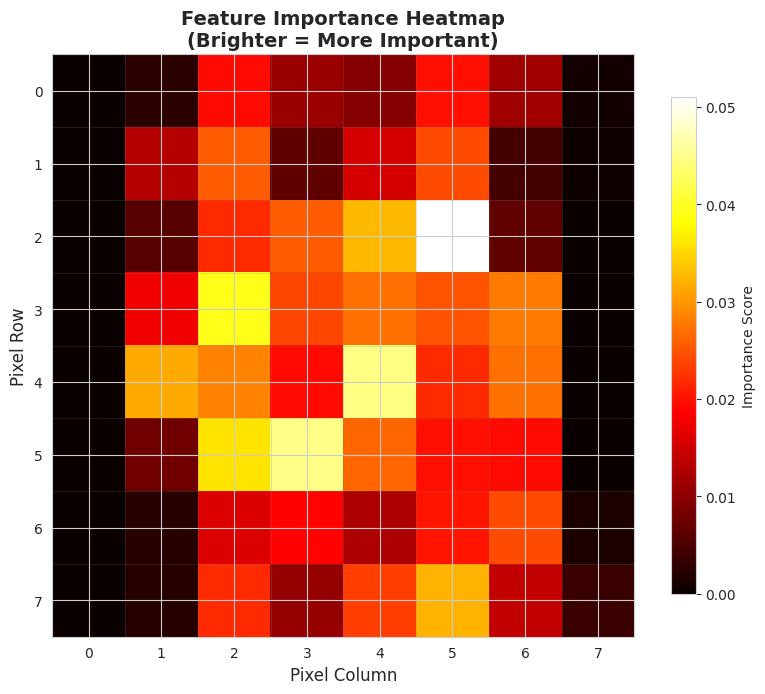


Observation: Central pixels are most important for digit classification!
Edge pixels contribute less to distinguishing between digits.


In [20]:
# Visualize feature importance as heatmap
importance_image = feature_importances.reshape(8, 8)

plt.figure(figsize=(8, 7))
plt.imshow(importance_image, cmap='hot', interpolation='nearest')
plt.colorbar(label='Importance Score', shrink=0.8)
plt.title('Feature Importance Heatmap\n(Brighter = More Important)',
          fontsize=14, fontweight='bold')
plt.xlabel('Pixel Column', fontsize=12)
plt.ylabel('Pixel Row', fontsize=12)

# Add grid
for i in range(9):
    plt.axhline(i - 0.5, color='gray', linewidth=0.5, alpha=0.3)
    plt.axvline(i - 0.5, color='gray', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: Central pixels are most important for digit classification!")
print("Edge pixels contribute less to distinguishing between digits.")

In [21]:
# Test performance with different numbers of top features
n_features_list = [5, 10, 20, 30, 40, 50, 64]
selection_results = []

for n_feats in n_features_list:
    # Select top n features
    top_features = indices[:n_feats]

    # Train on selected features
    X_train_selected = X_train[:, top_features]
    X_test_selected = X_test[:, top_features]

    rf_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf_selected.fit(X_train_selected, y_train)

    accuracy = rf_selected.score(X_test_selected, y_test)
    selection_results.append((n_feats, accuracy))
    print(f"Features: {n_feats:2d} | Accuracy: {accuracy:.4f}")

Features:  5 | Accuracy: 0.7389
Features: 10 | Accuracy: 0.8889
Features: 20 | Accuracy: 0.9444
Features: 30 | Accuracy: 0.9556
Features: 40 | Accuracy: 0.9611
Features: 50 | Accuracy: 0.9611
Features: 64 | Accuracy: 0.9704


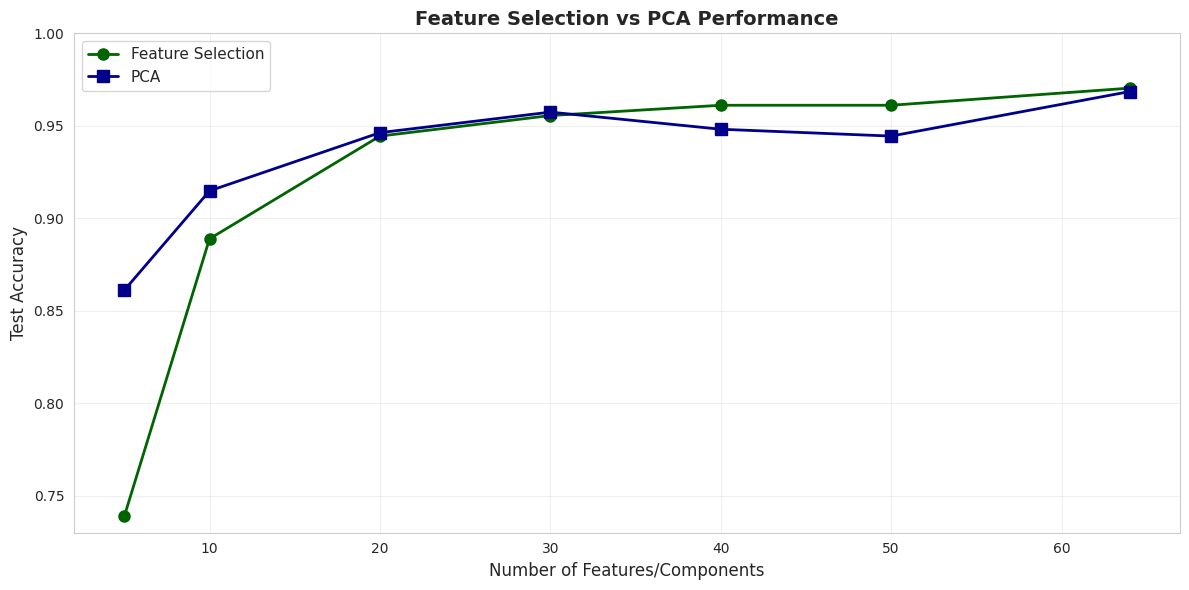

In [24]:
# Compare Feature Selection vs PCA
fig, ax = plt.subplots(figsize=(12, 6))

# Feature selection results
fs_components = [r[0] for r in selection_results]
fs_accuracy = [r[1] for r in selection_results]
ax.plot(fs_components, fs_accuracy, 'o-', linewidth=2, markersize=8,
        label='Feature Selection', color='darkgreen')

# PCA results (from earlier)
pca_components = results_df['n_components'].tolist()
pca_accuracy = results_df['accuracy'].tolist()
ax.plot(pca_components, pca_accuracy, 's-', linewidth=2, markersize=8,
        label='PCA', color='darkblue')

ax.set_xlabel('Number of Features/Components', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)
ax.set_title('Feature Selection vs PCA Performance', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
ax.set_ylim([0.73, 1.0])

plt.tight_layout()
plt.show()

### Key Insights:
* **Feature Selection** keeps original features (interpretable)
* **PCA** may perform slightly better by combining features
* Both achieve excellent dimensionality reduction
* Choice depends on: interpretability needs, domain requirements, performance goals

---
## 7. Real-World Application: Breast Cancer Dataset

Let's apply dimensionality reduction to a real medical dataset: the Breast Cancer Wisconsin dataset with 30 features describing cell nuclei characteristics.

In [25]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("="*60)
print("BREAST CANCER DATASET")
print("="*60)
print(f"Samples: {X_cancer.shape[0]}")
print(f"Features: {X_cancer.shape[1]}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")
print("="*60)

BREAST CANCER DATASET
Samples: 569
Features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]


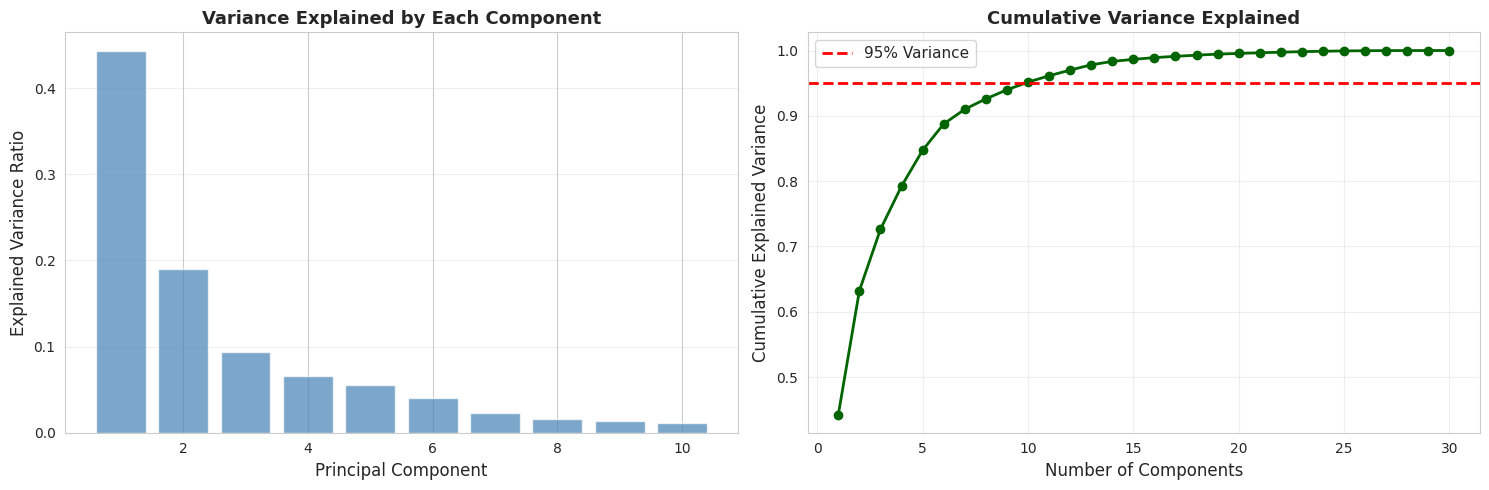


Components for 95% variance: 10
Dimensionality reduction: 30 → 10 (66.7% reduction)


In [26]:
# Standardize
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# Apply PCA
pca_cancer = PCA()
X_cancer_pca = pca_cancer.fit_transform(X_cancer_scaled)

# Calculate cumulative variance
cumvar_cancer = np.cumsum(pca_cancer.explained_variance_ratio_)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
ax1.bar(range(1, 11), pca_cancer.explained_variance_ratio_[:10],
        alpha=0.7, color='steelblue')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Variance Explained by Each Component', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumvar_cancer) + 1), cumvar_cancer,
         'o-', linewidth=2, markersize=6, color='darkgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find components for 95% variance
n_comp_95 = np.argmax(cumvar_cancer >= 0.95) + 1
print(f"\nComponents for 95% variance: {n_comp_95}")
print(f"Dimensionality reduction: {X_cancer.shape[1]} → {n_comp_95} "
      f"({100*(1-n_comp_95/X_cancer.shape[1]):.1f}% reduction)")

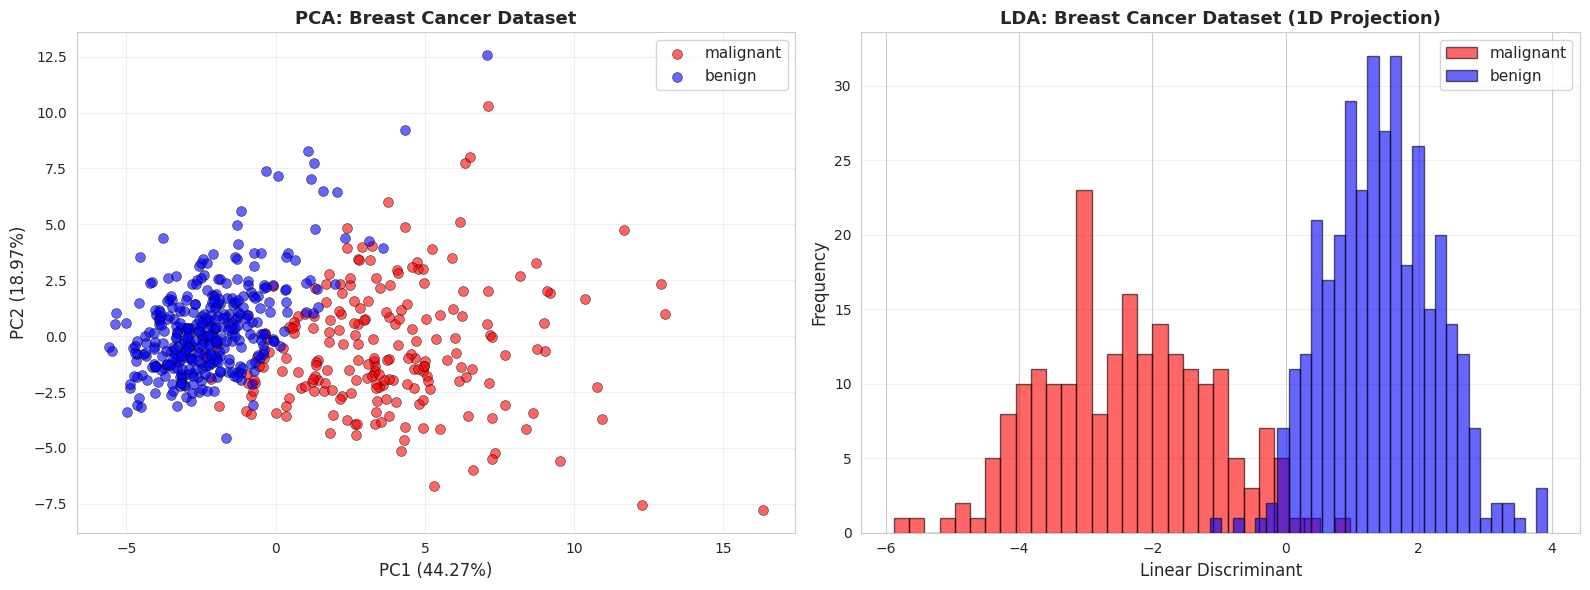


Observation: LDA achieves excellent class separation with just 1 component!
This demonstrates the power of supervised dimensionality reduction.


In [27]:
# Visualize in 2D using both PCA and LDA
pca_cancer_2d = PCA(n_components=2)
X_cancer_pca_2d = pca_cancer_2d.fit_transform(X_cancer_scaled)

lda_cancer_2d = LDA(n_components=1)  # Binary classification: max 1 component
X_cancer_lda_1d = lda_cancer_2d.fit_transform(X_cancer_scaled, y_cancer)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# PCA visualization
for label, color in zip([0, 1], ['red', 'blue']):
    mask = y_cancer == label
    ax1.scatter(X_cancer_pca_2d[mask, 0], X_cancer_pca_2d[mask, 1],
               c=color, label=cancer.target_names[label],
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel(f'PC1 ({pca_cancer_2d.explained_variance_ratio_[0]:.2%})', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca_cancer_2d.explained_variance_ratio_[1]:.2%})', fontsize=12)
ax1.set_title('PCA: Breast Cancer Dataset', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3)

# LDA visualization (1D, so we plot as histogram)
for label, color in zip([0, 1], ['red', 'blue']):
    mask = y_cancer == label
    ax2.hist(X_cancer_lda_1d[mask], bins=30, alpha=0.6,
            label=cancer.target_names[label], color=color, edgecolor='black')
ax2.set_xlabel('Linear Discriminant', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('LDA: Breast Cancer Dataset (1D Projection)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: LDA achieves excellent class separation with just 1 component!")
print("This demonstrates the power of supervised dimensionality reduction.")

In [28]:
# Performance comparison
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer_scaled, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer
)

# Original features
rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train_c, y_train_c)
acc_original = rf_original.score(X_test_c, y_test_c)

# PCA with 10 components
pca_10 = PCA(n_components=10)
X_train_pca = pca_10.fit_transform(X_train_c)
X_test_pca = pca_10.transform(X_test_c)
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca, y_train_c)
acc_pca = rf_pca.score(X_test_pca, y_test_c)

# LDA with 1 component
lda_1 = LDA(n_components=1)
X_train_lda = lda_1.fit_transform(X_train_c, y_train_c)
X_test_lda = lda_1.transform(X_test_c)
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_lda.fit(X_train_lda, y_train_c)
acc_lda = rf_lda.score(X_test_lda, y_test_c)

print("="*60)
print("PERFORMANCE COMPARISON - BREAST CANCER DATASET")
print("="*60)
print(f"Original (30 features):    Accuracy = {acc_original:.4f}")
print(f"PCA (10 components):       Accuracy = {acc_pca:.4f}")
print(f"LDA (1 component):         Accuracy = {acc_lda:.4f}")
print("="*60)
print("\nKey Insight: Even with massive dimensionality reduction,")
print("we maintain excellent classification performance!")
print("="*60)

PERFORMANCE COMPARISON - BREAST CANCER DATASET
Original (30 features):    Accuracy = 0.9357
PCA (10 components):       Accuracy = 0.9532
LDA (1 component):         Accuracy = 0.9357

Key Insight: Even with massive dimensionality reduction,
we maintain excellent classification performance!


---
## 8. Practical Guidelines and Best Practices

### When to Apply Dimensionality Reduction:

**Apply dimensionality reduction when:**
1. You have **many features** (high-dimensional data)
2. Features are **correlated** or redundant
3. You need to **visualize** high-dimensional data
4. Training is **too slow** or memory-intensive
5. You suspect **overfitting** due to too many features
6. You need to **compress** data for storage

**Don't apply dimensionality reduction when:**
1. You have **few features** already (e.g., < 10)
2. All features are **important** and non-redundant
3. You need **interpretability** of original features
4. Performance is already **good** without it
5. You have **sufficient computational resources**

### Choosing the Right Technique:

```
START
  |
  ├─ Need to preserve original features?
  │   └─ YES → Use FEATURE SELECTION
  │
  └─ NO → Can create new features?
      |
      ├─ Have labels for supervised task?
      │   ├─ YES → Use LDA (classification)
      │   └─ NO → Use PCA
      |
      ├─ Only for visualization?
      │   └─ YES → Use t-SNE (or UMAP)
      │
      └─ Need fast computation?
          ├─ YES → Use PCA
          └─ NO → Consider non-linear methods
```

### Step-by-Step Workflow:

**1. Preprocessing:**
```python
# Always standardize for PCA/LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

**2. Determine Number of Components:**
```python
# Fit PCA with all components
pca = PCA()
pca.fit(X_scaled)

# Find components for desired variance (e.g., 95%)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.95) + 1
```

**3. Apply Transformation:**
```python
# Fit on training data only!
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Only transform, don't fit!
```

**4. Train Model:**
```python
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
```

**5. Evaluate:**
```python
accuracy = model.score(X_test_pca, y_test)
```

---
## 9. Common Pitfalls and How to Avoid Them

### ❌ Pitfall 1: Not Standardizing Data
```python
# WRONG: PCA on non-standardized data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Features have different scales!
```

**✓ Correct:**
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
```

### ❌ Pitfall 2: Data Leakage (Fitting on All Data)
```python
# WRONG: Fitting PCA on all data before train/test split
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)  # Test data influences PCA!
X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
```

**✓ Correct:**
```python
# Split first, then fit PCA only on training data
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Only transform!
```

### ❌ Pitfall 3: Using t-SNE for Machine Learning
```python
# WRONG: Training model on t-SNE output
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
model.fit(X_tsne, y)  # t-SNE is for visualization only!
```

**✓ Correct:**
```python
# Use PCA or LDA for dimensionality reduction before ML
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
model.fit(X_pca, y)

# Use t-SNE only for visualization
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
```

### ❌ Pitfall 4: Ignoring Explained Variance
```python
# WRONG: Arbitrary choice of components
pca = PCA(n_components=5)  # Why 5? May lose too much information
```

**✓ Correct:**
```python
# Determine components based on explained variance
pca_full = PCA()
pca_full.fit(X)
cumvar = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(cumvar >= 0.95) + 1  # 95% variance

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
```

### ❌ Pitfall 5: Using LDA with Too Few Samples per Class
```python
# PROBLEMATIC: LDA with imbalanced or small classes
# If some classes have very few samples, LDA may fail
lda = LDA(n_components=5)
X_lda = lda.fit_transform(X, y)  # May give poor results
```

**✓ Better:**
```python
# Check class distribution first
print(np.bincount(y))

# If imbalanced or small classes, use PCA instead
if min(np.bincount(y)) < 10:  # Threshold example
    pca = PCA(n_components=5)
    X_reduced = pca.fit_transform(X)
else:
    lda = LDA(n_components=5)
    X_reduced = lda.fit_transform(X, y)
```

---
## 10. Conclusion

Dimensionality reduction is a fundamental technique in machine learning that enables us to:
- Work with high-dimensional data efficiently
- Visualize complex datasets
- Improve model performance by removing noise
- Reduce computational costs
- Gain insights into data structure

By understanding when and how to apply techniques like PCA, LDA, and t-SNE, you can tackle the curse of dimensionality and build more effective machine learning pipelines. Remember: the goal is not always to reduce dimensions, but to find the right representation of your data that balances information retention, computational efficiency, and model performance.